## Feature Selection

In [41]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
path = '/content/drive/MyDrive/Data/Mortality Extract -pse2.xlsx'

In [44]:
data1 = pd.read_excel(path,'Sheet1')

In [45]:
data1.describe()

,SK_PatientID,Gender,Age,IP12M,IPHIST,AE12M,OP12M,Waiting list - prioritised OP,Waiting list - unprioritised OP,Diabetic OP,Cancer OP,Social Community,Readmission model,Readmission likelihood,Unnamed: 15,Ace,AF,Alcohol,Antagonist,Anticoag,Asthma,B12,Beta,BloodTest,BMI,BoneSparing,BP,Breathlessness,Calcium,Cancer,CardioVasc,Cervical,CervixRemoval,CHD,Cholesterol,CKD,Clopidogrel,Contraception,COPD,Dementia,...,DXA,Echocardiogram,Epilepsy,FEV1,FluVacc,FolateTests,Foot,Fracture,HF,Hypertension,IFCC,LiverTest,LVSD,MHealth,MicroAlb,MRI,Neuropathy,Osteoporosis,OTCsalic,OxygenSat,PAD,Palliative,PEFR,Pharmaco,Proteinuria,Renal,RheumArth,Salicylate,SerumChol,SerumCreat,SerumFructo,SerumLithium,Smoker,Statin,Stroke,Thyroid,TIA,TSH,Died_Status,MORT_RISK
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,1.0,0.0,1.0,1.0,1.0,1.0,1.00,1.00,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000
mean,5000.50000,2.500200,38.788200,0.255200,0.554600,0.264100,2.21390,2.0,NaN,0.3,0.5,2.0,3.0,0.66,1.98,0.00830,0.013300,0.604900,0.004000,0.008000,0.115800,0.270100,0.00580,0.585400,0.684100,0.000900,0.6856,0.022100,0.3513,0.033400,0.246400,0.300300,0.014700,0.0184,0.397300,0.02130,0.006400,0.079600,0.030500,0.008700,...,0.003900,0.072600,0.009000,0.049100,0.373300,0.257000,0.045800,0.005300,0.005700,0.103400,0.355000,0.523400,0.002000,0.012800,0.003000,0.095900,0.004200,0.015800,0.014400,0.081500,0.003100,0.007200,0.055100,0.0184,0.001400,0.542700,0.006400,0.01030,0.018800,0.532400,0.000400,0.001700,0.755800,0.002400,0.020000,0.484500,0.004500,0.484600,0.0,0.005862
std,2886.89568,0.500425,21.644482,1.936091,3.979071,0.891084,6.34435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09073,0.114562,0.488897,0.063122,0.089089,0.320001,0.444033,0.07594,0.492677,0.464897,0.029988,0.4643,0.147016,0.4774,0.179688,0.430936,0.458411,0.120355,0.1344,0.489364,0.14439,0.079748,0.270686,0.171967,0.092872,...,0.062331,0.259492,0.094445,0.216088,0.483705,0.437001,0.209062,0.072612,0.075287,0.304496,0.478537,0.499477,0.044679,0.112416,0.054693,0.294469,0.064674,0.124707,0.119139,0.273615,0.055594,0.084551,0.228187,0.1344,0.037392,0.498198,0.079748,0.10097,0.135825,0.498974,0.019997,0.041198,0.429633,0.048933,0.140007,0.499785,0.066934,0.499788,0.0,0.022700
min,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.0,NaN,0.3,0.5,2.0,3.0,0.66,1.98,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2500.75000,2.000000,23.000000,0.000000,0.000000,0.000000,0.00000,2.0,NaN,0.3,0.5,2.0,3.0,0.66,1.98,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0

In [46]:
data = data1.drop(['GP_PRACTICE','Waiting list - prioritised OP','Waiting list - unprioritised OP','Diabetic OP','Cancer OP','Social Community','Readmission model','Readmission likelihood','Unnamed: 15'],axis = 1)

In [47]:
data.head()

,SK_PatientID,Gender,Age,IP12M,IPHIST,AE12M,OP12M,Ace,AF,Alcohol,Antagonist,Anticoag,Asthma,B12,Beta,BloodTest,BMI,BoneSparing,BP,Breathlessness,Calcium,Cancer,CardioVasc,Cervical,CervixRemoval,CHD,Cholesterol,CKD,Clopidogrel,Contraception,COPD,Dementia,Depression,Diabetes,Dipyridamole,DXA,Echocardiogram,Epilepsy,FEV1,FluVacc,FolateTests,Foot,Fracture,HF,Hypertension,IFCC,LiverTest,LVSD,MHealth,MicroAlb,MRI,Neuropathy,Osteoporosis,OTCsalic,OxygenSat,PAD,Palliative,PEFR,Pharmaco,Proteinuria,Renal,RheumArth,Salicylate,SerumChol,SerumCreat,SerumFructo,SerumLithium,Smoker,Statin,Stroke,Thyroid,TIA,TSH,Died_Status,MORT_RISK
0,1,3,98,24,9,11,12,0,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0.635857
1,2,3,77,13,5,0,16,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0.414805
2,3,3,94,0,15,0,25,1,1,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,0.397581
3,4,2,72,57,14,0,41,0,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0.379220
4,5,2,81,24,45,2,32,1,0,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0.358592


In [48]:
data.shape

(10000, 75)

In [49]:
X = data.iloc[:,1:74]  #independent columns
y = (data.iloc[:,-1])*100    #target column i.e price range

In [50]:
x = X.astype(int)
y = y.astype(int)

In [51]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)


In [52]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [53]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [54]:
featureScores

,Specs,Score
0,Gender,3.168142
1,Age,32302.180488
2,IP12M,64114.320346
3,IPHIST,111103.347005
4,AE12M,2396.559654
...,...,...
68,Stroke,2607.704382
69,Thyroid,315.699433
70,TIA,828.836063
71,TSH,315.474447


In [55]:
print(featureScores.nlargest(72,'Score'))  #print All best features

            Specs          Score
3          IPHIST  111103.347005
2           IP12M   64114.320346
5           OP12M   32572.147712
1             Age   32302.180488
30       Dementia    5640.358496
..            ...            ...
65   SerumLithium      54.014625
66         Smoker      45.757870
28  Contraception      41.929617
22       Cervical      31.601472
0          Gender       3.168142

[72 rows x 2 columns]


In [56]:
print(featureScores.nlargest(65,'Score'))  #print 65 best features

          Specs          Score
3        IPHIST  111103.347005
2         IP12M   64114.320346
5         OP12M   32572.147712
1           Age   32302.180488
30     Dementia    5640.358496
..          ...            ...
58  Proteinuria     150.445589
21   CardioVasc     136.483890
8       Alcohol     111.003865
17           BP     109.264536
34          DXA      77.357840

[65 rows x 2 columns]


In [57]:
print(featureScores.nlargest(50,'Score'))  #print 50 best features

             Specs          Score
3           IPHIST  111103.347005
2            IP12M   64114.320346
5            OP12M   32572.147712
1              Age   32302.180488
30        Dementia    5640.358496
55      Palliative    5509.534623
20          Cancer    3145.788537
16     BoneSparing    2804.683340
26             CKD    2768.414332
46            LVSD    2635.631174
68          Stroke    2607.704382
4            AE12M    2396.559654
42              HF    2375.715060
7               AF    2130.132041
43    Hypertension    1736.538974
18  Breathlessness    1682.300967
67          Statin    1604.502392
9       Antagonist    1582.112827
24             CHD    1500.285542
10        Anticoag    1450.361500
6              Ace    1362.896391
64     SerumFructo    1248.477701
29            COPD    1245.908712
52        OTCsalic    1240.213190
41        Fracture    1201.523449
27     Clopidogrel    1121.043890
54             PAD    1107.530467
35  Echocardiogram    1062.760823
37            

In [58]:
print(featureScores.nlargest(20,'Score'))  #print 20 best features

             Specs          Score
3           IPHIST  111103.347005
2            IP12M   64114.320346
5            OP12M   32572.147712
1              Age   32302.180488
30        Dementia    5640.358496
55      Palliative    5509.534623
20          Cancer    3145.788537
16     BoneSparing    2804.683340
26             CKD    2768.414332
46            LVSD    2635.631174
68          Stroke    2607.704382
4            AE12M    2396.559654
42              HF    2375.715060
7               AF    2130.132041
43    Hypertension    1736.538974
18  Breathlessness    1682.300967
67          Statin    1604.502392
9       Antagonist    1582.112827
24             CHD    1500.285542
10        Anticoag    1450.361500


## Feature Importance

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [60]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[1.63472894e-02 1.06524590e-01 3.19614711e-02 2.84357295e-02
 2.58639252e-02 4.50856230e-02 4.85188085e-03 1.73223032e-02
 8.22914370e-03 3.33077835e-03 4.45814740e-03 9.78026107e-03
 1.05403932e-02 5.13624876e-03 2.08115679e-03 5.41806365e-03
 1.03735083e-03 2.67314580e-03 2.61585425e-02 1.10837717e-02
 1.14975101e-01 2.34366090e-02 1.62451102e-02 5.18416338e-03
 1.22085850e-02 1.45711501e-02 5.29947891e-02 3.12759860e-03
 3.06554837e-03 1.57970442e-02 2.15883478e-02 1.13580322e-02
 9.18820742e-03 1.65321632e-03 1.66204468e-03 1.41615243e-02
 2.11681754e-03 1.29794430e-02 2.40684729e-02 1.23946591e-02
 1.30557989e-02 7.17178755e-03 9.64103881e-03 3.55341850e-02
 9.37508668e-03 2.36706844e-03 2.16081867e-03 4.74181048e-03
 1.90074083e-03 1.36032594e-02 7.71532080e-03 1.05703406e-02
 9.18792346e-03 1.57109405e-02 6.86834750e-03 1.69986748e-02
 6.83857818e-03 4.56341807e-03 2.00479099e-03 2.16804034e-03
 6.04956424e-03 4.28023636e-03 7.07231596e-03 2.07673068e-03
 4.87079214e-05 9.965085

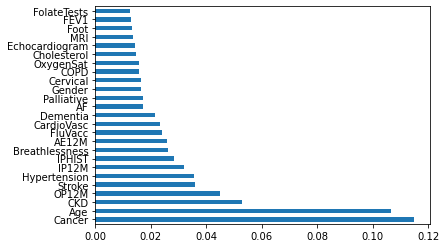

In [61]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

## Correlation Matrix with Heatmap

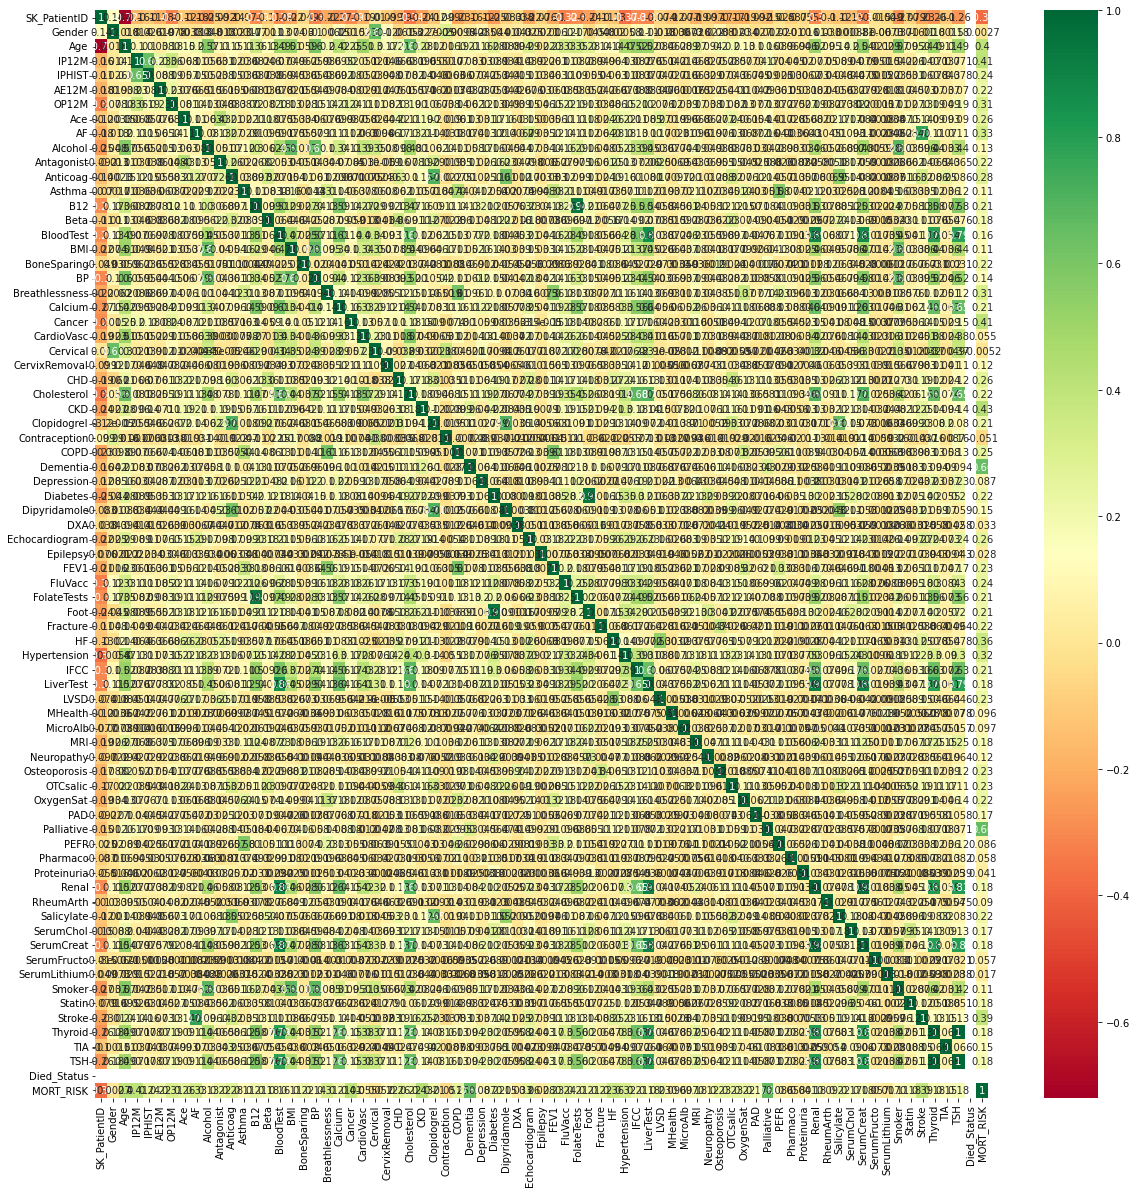

In [62]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Correlation matrix only for the top 50 features affecting

In [63]:
data.head()

,SK_PatientID,Gender,Age,IP12M,IPHIST,AE12M,OP12M,Ace,AF,Alcohol,Antagonist,Anticoag,Asthma,B12,Beta,BloodTest,BMI,BoneSparing,BP,Breathlessness,Calcium,Cancer,CardioVasc,Cervical,CervixRemoval,CHD,Cholesterol,CKD,Clopidogrel,Contraception,COPD,Dementia,Depression,Diabetes,Dipyridamole,DXA,Echocardiogram,Epilepsy,FEV1,FluVacc,FolateTests,Foot,Fracture,HF,Hypertension,IFCC,LiverTest,LVSD,MHealth,MicroAlb,MRI,Neuropathy,Osteoporosis,OTCsalic,OxygenSat,PAD,Palliative,PEFR,Pharmaco,Proteinuria,Renal,RheumArth,Salicylate,SerumChol,SerumCreat,SerumFructo,SerumLithium,Smoker,Statin,Stroke,Thyroid,TIA,TSH,Died_Status,MORT_RISK
0,1,3,98,24,9,11,12,0,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0.635857
1,2,3,77,13,5,0,16,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0.414805
2,3,3,94,0,15,0,25,1,1,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,0.397581
3,4,2,72,57,14,0,41,0,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0.379220
4,5,2,81,24,45,2,32,1,0,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0.358592


In [64]:
data.columns

Index(['SK_PatientID', 'Gender', 'Age', 'IP12M', 'IPHIST', 'AE12M', 'OP12M',
       'Ace', 'AF', 'Alcohol', 'Antagonist', 'Anticoag', 'Asthma', 'B12',
       'Beta', 'BloodTest', 'BMI', 'BoneSparing', 'BP', 'Breathlessness',
       'Calcium', 'Cancer', 'CardioVasc', 'Cervical', 'CervixRemoval', 'CHD',
       'Cholesterol', 'CKD', 'Clopidogrel', 'Contraception', 'COPD',
       'Dementia', 'Depression', 'Diabetes', 'Dipyridamole', 'DXA',
       'Echocardiogram', 'Epilepsy', 'FEV1', 'FluVacc', 'FolateTests', 'Foot',
       'Fracture', 'HF', 'Hypertension', 'IFCC', 'LiverTest', 'LVSD',
       'MHealth', 'MicroAlb', 'MRI', 'Neuropathy', 'Osteoporosis', 'OTCsalic',
       'OxygenSat', 'PAD', 'Palliative', 'PEFR', 'Pharmaco', 'Proteinuria',
       'Renal', 'RheumArth', 'Salicylate', 'SerumChol', 'SerumCreat',
       'SerumFructo', 'SerumLithium', 'Smoker', 'Statin', 'Stroke', 'Thyroid',
       'TIA', 'TSH', 'Died_Status', 'MORT_RISK'],
      dtype='object')

In [65]:
Mor = data.iloc[:,[1,2,3,4,5,6,7,9,10,12,13,16,18,19,20,23,24,25,26,27,29,30,32,33,35,37,38,39,40,41,42,43,44,46,48,49,50,51,52,53,54,55,60,61,62,64,67,68,69,70]]

In [66]:
Mor.head()

,Gender,Age,IP12M,IPHIST,AE12M,OP12M,Ace,Alcohol,Antagonist,Asthma,B12,BMI,BP,Breathlessness,Calcium,Cervical,CervixRemoval,CHD,Cholesterol,CKD,Contraception,COPD,Depression,Diabetes,DXA,Epilepsy,FEV1,FluVacc,FolateTests,Foot,Fracture,HF,Hypertension,LiverTest,MHealth,MicroAlb,MRI,Neuropathy,Osteoporosis,OTCsalic,OxygenSat,PAD,Renal,RheumArth,Salicylate,SerumCreat,Smoker,Statin,Stroke,Thyroid
0,3,98,24,9,11,12,0,1,0,1,0,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,1,0,1,0,1,1,0,1,1,0,0,1
1,3,77,13,5,0,16,0,1,0,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,1
2,3,94,0,15,0,25,1,1,1,0,1,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,1,0,0,1,0,1,0,1,0,1,1,1,0,1,1
3,2,72,57,14,0,41,0,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,1,0,1,1
4,2,81,24,45,2,32,1,1,0,1,1,1,1,0,1,0,0,1,1,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1


In [67]:
Mor.shape

(10000, 50)

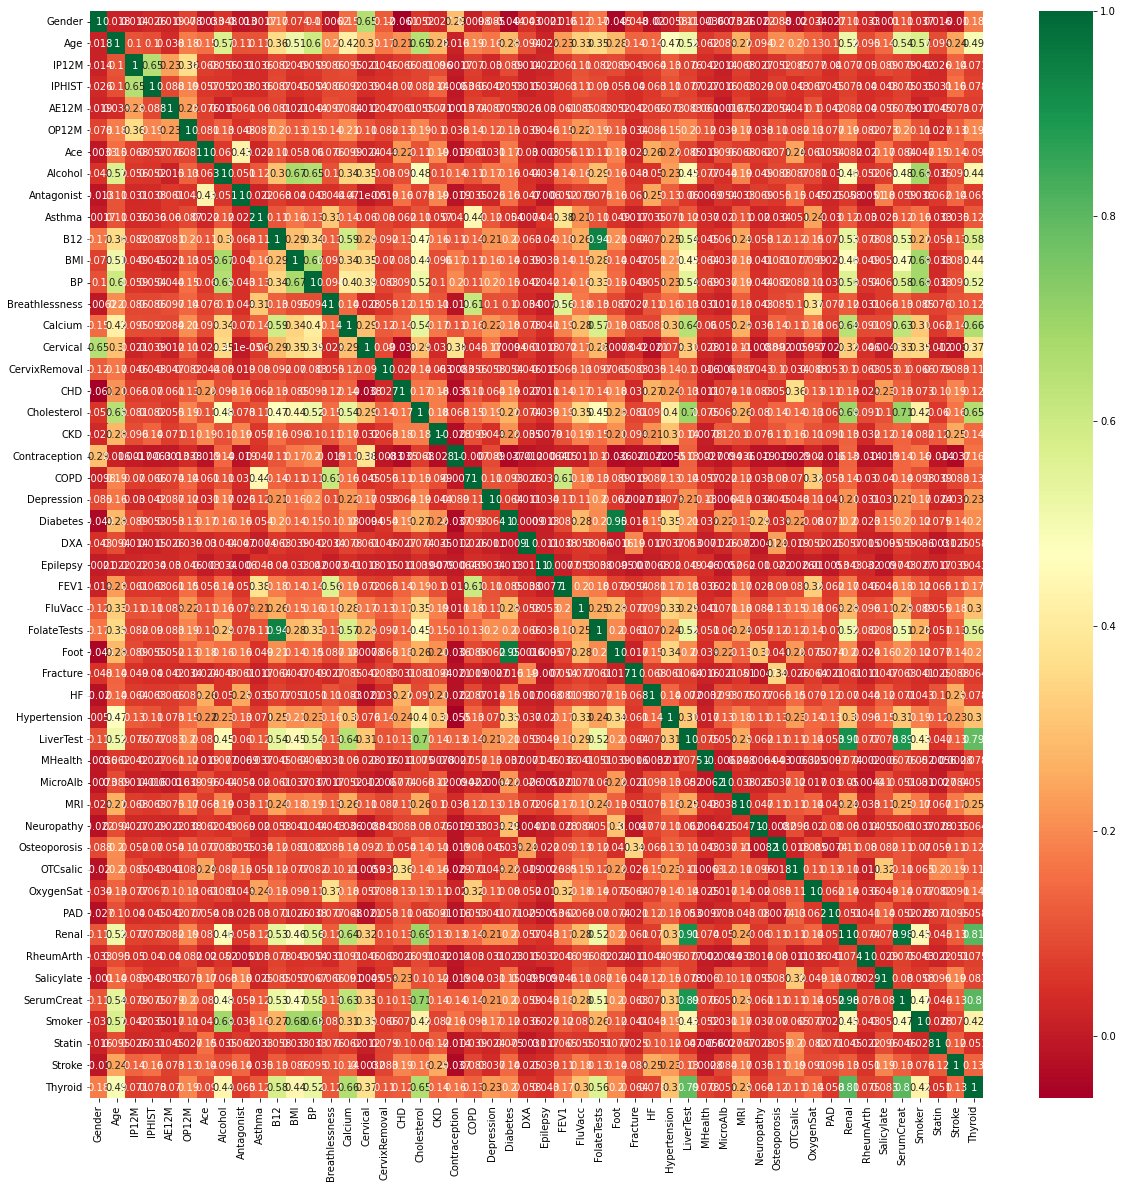

In [68]:
corrmat = Mor.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Mor[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Correlation matrix only for the top 20 features affecting

In [69]:
Mor.head()

,Gender,Age,IP12M,IPHIST,AE12M,OP12M,Ace,Alcohol,Antagonist,Asthma,B12,BMI,BP,Breathlessness,Calcium,Cervical,CervixRemoval,CHD,Cholesterol,CKD,Contraception,COPD,Depression,Diabetes,DXA,Epilepsy,FEV1,FluVacc,FolateTests,Foot,Fracture,HF,Hypertension,LiverTest,MHealth,MicroAlb,MRI,Neuropathy,Osteoporosis,OTCsalic,OxygenSat,PAD,Renal,RheumArth,Salicylate,SerumCreat,Smoker,Statin,Stroke,Thyroid
0,3,98,24,9,11,12,0,1,0,1,0,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,1,0,1,0,1,1,0,1,1,0,0,1
1,3,77,13,5,0,16,0,1,0,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,1
2,3,94,0,15,0,25,1,1,1,0,1,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,1,0,0,1,0,1,0,1,0,1,1,1,0,1,1
3,2,72,57,14,0,41,0,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,1,0,1,1
4,2,81,24,45,2,32,1,1,0,1,1,1,1,0,1,0,0,1,1,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1


In [70]:
Mor.columns

Index(['Gender', 'Age', 'IP12M', 'IPHIST', 'AE12M', 'OP12M', 'Ace', 'Alcohol',
       'Antagonist', 'Asthma', 'B12', 'BMI', 'BP', 'Breathlessness', 'Calcium',
       'Cervical', 'CervixRemoval', 'CHD', 'Cholesterol', 'CKD',
       'Contraception', 'COPD', 'Depression', 'Diabetes', 'DXA', 'Epilepsy',
       'FEV1', 'FluVacc', 'FolateTests', 'Foot', 'Fracture', 'HF',
       'Hypertension', 'LiverTest', 'MHealth', 'MicroAlb', 'MRI', 'Neuropathy',
       'Osteoporosis', 'OTCsalic', 'OxygenSat', 'PAD', 'Renal', 'RheumArth',
       'Salicylate', 'SerumCreat', 'Smoker', 'Statin', 'Stroke', 'Thyroid'],
      dtype='object')

In [71]:
print(featureScores.nlargest(20,'Score'))  #print 50 best features

             Specs          Score
3           IPHIST  111103.347005
2            IP12M   64114.320346
5            OP12M   32572.147712
1              Age   32302.180488
30        Dementia    5640.358496
55      Palliative    5509.534623
20          Cancer    3145.788537
16     BoneSparing    2804.683340
26             CKD    2768.414332
46            LVSD    2635.631174
68          Stroke    2607.704382
4            AE12M    2396.559654
42              HF    2375.715060
7               AF    2130.132041
43    Hypertension    1736.538974
18  Breathlessness    1682.300967
67          Statin    1604.502392
9       Antagonist    1582.112827
24             CHD    1500.285542
10        Anticoag    1450.361500


In [72]:
Mor.shape

(10000, 50)

In [73]:
x.columns

Index(['Gender', 'Age', 'IP12M', 'IPHIST', 'AE12M', 'OP12M', 'Ace', 'AF',
       'Alcohol', 'Antagonist', 'Anticoag', 'Asthma', 'B12', 'Beta',
       'BloodTest', 'BMI', 'BoneSparing', 'BP', 'Breathlessness', 'Calcium',
       'Cancer', 'CardioVasc', 'Cervical', 'CervixRemoval', 'CHD',
       'Cholesterol', 'CKD', 'Clopidogrel', 'Contraception', 'COPD',
       'Dementia', 'Depression', 'Diabetes', 'Dipyridamole', 'DXA',
       'Echocardiogram', 'Epilepsy', 'FEV1', 'FluVacc', 'FolateTests', 'Foot',
       'Fracture', 'HF', 'Hypertension', 'IFCC', 'LiverTest', 'LVSD',
       'MHealth', 'MicroAlb', 'MRI', 'Neuropathy', 'Osteoporosis', 'OTCsalic',
       'OxygenSat', 'PAD', 'Palliative', 'PEFR', 'Pharmaco', 'Proteinuria',
       'Renal', 'RheumArth', 'Salicylate', 'SerumChol', 'SerumCreat',
       'SerumFructo', 'SerumLithium', 'Smoker', 'Statin', 'Stroke', 'Thyroid',
       'TIA', 'TSH', 'Died_Status'],
      dtype='object')

In [74]:
data.columns

Index(['SK_PatientID', 'Gender', 'Age', 'IP12M', 'IPHIST', 'AE12M', 'OP12M',
       'Ace', 'AF', 'Alcohol', 'Antagonist', 'Anticoag', 'Asthma', 'B12',
       'Beta', 'BloodTest', 'BMI', 'BoneSparing', 'BP', 'Breathlessness',
       'Calcium', 'Cancer', 'CardioVasc', 'Cervical', 'CervixRemoval', 'CHD',
       'Cholesterol', 'CKD', 'Clopidogrel', 'Contraception', 'COPD',
       'Dementia', 'Depression', 'Diabetes', 'Dipyridamole', 'DXA',
       'Echocardiogram', 'Epilepsy', 'FEV1', 'FluVacc', 'FolateTests', 'Foot',
       'Fracture', 'HF', 'Hypertension', 'IFCC', 'LiverTest', 'LVSD',
       'MHealth', 'MicroAlb', 'MRI', 'Neuropathy', 'Osteoporosis', 'OTCsalic',
       'OxygenSat', 'PAD', 'Palliative', 'PEFR', 'Pharmaco', 'Proteinuria',
       'Renal', 'RheumArth', 'Salicylate', 'SerumChol', 'SerumCreat',
       'SerumFructo', 'SerumLithium', 'Smoker', 'Statin', 'Stroke', 'Thyroid',
       'TIA', 'TSH', 'Died_Status', 'MORT_RISK'],
      dtype='object')

In [75]:
Mor_20 = X.iloc[:,[1,2,3,4,5,7,9,10,16,18,20,24,26,30,42,43,46,55,67,68]]

In [76]:
Mor_20.columns

Index(['Age', 'IP12M', 'IPHIST', 'AE12M', 'OP12M', 'AF', 'Antagonist',
       'Anticoag', 'BoneSparing', 'Breathlessness', 'Cancer', 'CHD', 'CKD',
       'Dementia', 'HF', 'Hypertension', 'LVSD', 'Palliative', 'Statin',
       'Stroke'],
      dtype='object')

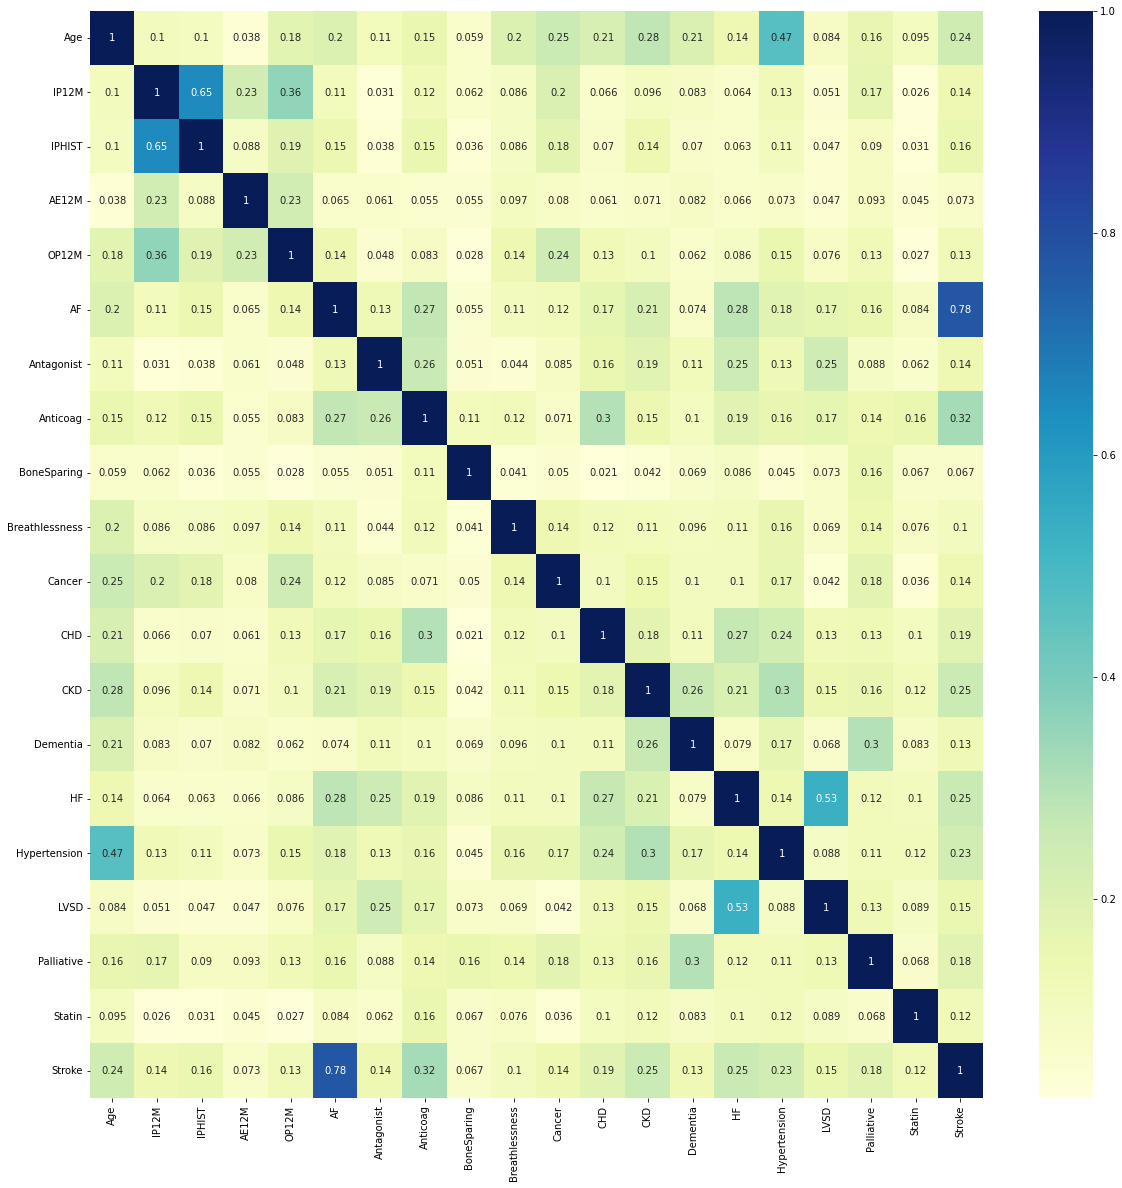

In [77]:
corrmat = Mor_20.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Mor_20[top_corr_features].corr(),annot=True,cmap="YlGnBu")

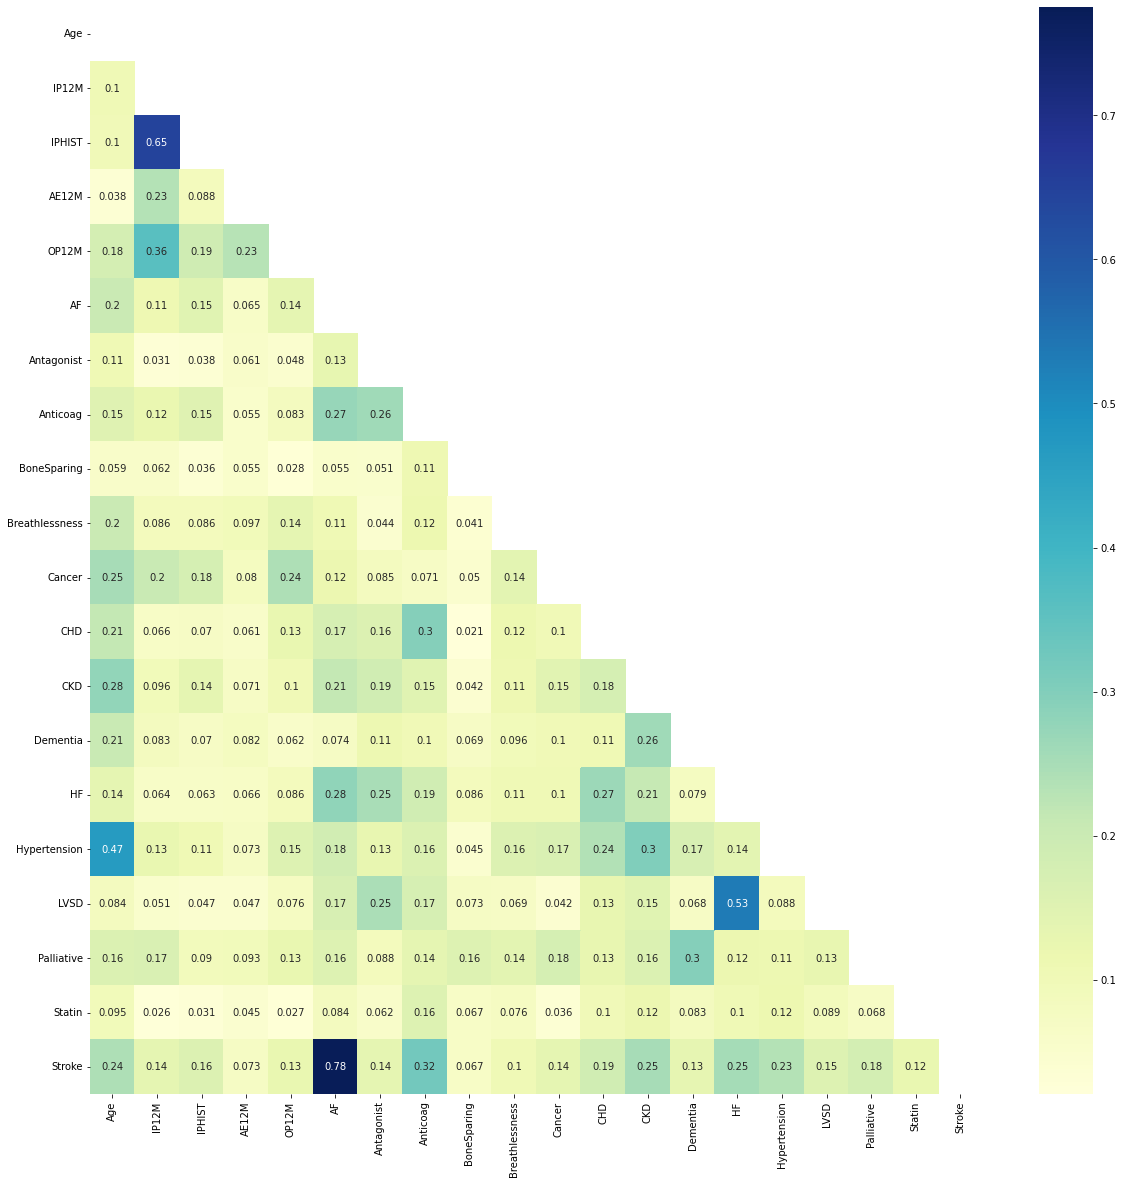

In [78]:
corrmat = Mor_20.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
mask = np.triu(np.ones_like(Mor_20[top_corr_features].corr(),dtype = np.bool))
#plot heat map
g=sns.heatmap(Mor_20[top_corr_features].corr(),mask=mask,annot=True,cmap="YlGnBu")

In [79]:
T = data.MORT_RISK

In [80]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

ModuleNotFoundError: ignored